In [1]:
from dpm.models import LogisticRegression, BayesianLogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from dpm.visualize import plot_stats
import torch
from sklearn.datasets import make_classification

In [2]:
x, y = make_classification()
x = torch.tensor(x).float()
y = torch.tensor(y).view(-1, 1).float()
x.shape, y.shape

(torch.Size([100, 20]), torch.Size([100, 1]))

In [3]:
model = LogisticRegression(input_dim=x.size(1))

In [4]:
[p.view(-1) for p in model.model.parameters()]

[tensor([-0.1351,  0.1352,  0.0577,  0.2138, -0.1110,  0.0237, -0.1206,  0.0602,
         -0.0846,  0.1451, -0.1237,  0.1729, -0.2194,  0.1372,  0.0137, -0.2032,
         -0.1029,  0.0859,  0.1008, -0.1248], grad_fn=<ViewBackward>),
 tensor([-0.1944], grad_fn=<ViewBackward>)]

In [5]:
torch.cat([p.view(-1) for p in model.model.parameters()])

tensor([-0.1351,  0.1352,  0.0577,  0.2138, -0.1110,  0.0237, -0.1206,  0.0602,
        -0.0846,  0.1451, -0.1237,  0.1729, -0.2194,  0.1372,  0.0137, -0.2032,
        -0.1029,  0.0859,  0.1008, -0.1248, -0.1944], grad_fn=<CatBackward>)

In [6]:
stats = model.fit(x, y, epochs=1000, lr=0.1, batch_size=1024)

tensor([[0.2469],
        [0.5763],
        [0.4673],
        ...,
        [0.4909],
        [0.4379],
        [0.3334]], grad_fn=<ExpBackward>) tensor([[0.2469],
        [0.5763],
        [0.4673],
        ...,
        [0.4909],
        [0.4379],
        [0.3334]], grad_fn=<SigmoidBackward>)
tensor([[0.5569],
        [0.3015],
        [0.5746],
        ...,
        [0.2634],
        [0.6468],
        [0.7202]], grad_fn=<ExpBackward>) tensor([[0.5569],
        [0.3015],
        [0.5746],
        ...,
        [0.2634],
        [0.6468],
        [0.7202]], grad_fn=<SigmoidBackward>)
tensor([[0.6907],
        [0.5672],
        [0.5352],
        ...,
        [0.7086],
        [0.7398],
        [0.8345]], grad_fn=<ExpBackward>) tensor([[0.6907],
        [0.5672],
        [0.5352],
        ...,
        [0.7086],
        [0.7398],
        [0.8345]], grad_fn=<SigmoidBackward>)
tensor([[0.8541],
        [0.6614],
        [0.7386],
        ...,
        [0.6182],
        [0.9225],
        [0.8096

tensor([[1.2522e-04],
        [9.9016e-01],
        [9.9163e-01],
        ...,
        [1.7195e-01],
        [1.2537e-01],
        [1.1967e-01]], grad_fn=<ExpBackward>) tensor([[1.2522e-04],
        [9.9016e-01],
        [9.9163e-01],
        ...,
        [1.7195e-01],
        [1.2537e-01],
        [1.1967e-01]], grad_fn=<SigmoidBackward>)
tensor([[7.3878e-01],
        [3.7082e-02],
        [8.0821e-01],
        ...,
        [4.5158e-04],
        [9.8954e-01],
        [3.2007e-04]], grad_fn=<ExpBackward>) tensor([[7.3878e-01],
        [3.7082e-02],
        [8.0821e-01],
        ...,
        [4.5158e-04],
        [9.8954e-01],
        [3.2007e-04]], grad_fn=<SigmoidBackward>)
tensor([[7.8827e-01],
        [6.1778e-01],
        [2.7286e-01],
        ...,
        [9.9404e-01],
        [9.9664e-01],
        [8.8663e-04]], grad_fn=<ExpBackward>) tensor([[7.8827e-01],
        [6.1778e-01],
        [2.7286e-01],
        ...,
        [9.9404e-01],
        [9.9664e-01],
        [8.8663e-04]], g

tensor([[0.9850],
        [0.9991],
        [0.8766],
        ...,
        [0.3832],
        [0.7344],
        [0.9991]], grad_fn=<ExpBackward>) tensor([[0.9850],
        [0.9991],
        [0.8766],
        ...,
        [0.3832],
        [0.7344],
        [0.9991]], grad_fn=<SigmoidBackward>)
tensor([[9.0783e-03],
        [6.0107e-01],
        [1.0409e-08],
        ...,
        [9.2317e-03],
        [3.9349e-02],
        [3.9349e-02]], grad_fn=<ExpBackward>) tensor([[9.0783e-03],
        [6.0107e-01],
        [1.0309e-08],
        ...,
        [9.2317e-03],
        [3.9349e-02],
        [3.9349e-02]], grad_fn=<SigmoidBackward>)
tensor([[0.0143],
        [0.9701],
        [0.9483],
        ...,
        [0.9370],
        [0.5750],
        [0.5678]], grad_fn=<ExpBackward>) tensor([[0.0143],
        [0.9701],
        [0.9483],
        ...,
        [0.9370],
        [0.5750],
        [0.5678]], grad_fn=<SigmoidBackward>)
tensor([[9.2909e-02],
        [9.7934e-01],
        [2.5273e-02],
    

tensor([[2.6847e-01],
        [9.9897e-01],
        [9.6988e-01],
        ...,
        [1.8533e-06],
        [1.3722e-02],
        [1.3580e-01]], grad_fn=<ExpBackward>) tensor([[2.6847e-01],
        [9.9897e-01],
        [9.6988e-01],
        ...,
        [1.8532e-06],
        [1.3722e-02],
        [1.3580e-01]], grad_fn=<SigmoidBackward>)
tensor([[0.1398],
        [0.0608],
        [0.0054],
        ...,
        [0.9372],
        [0.9329],
        [0.0026]], grad_fn=<ExpBackward>) tensor([[0.1398],
        [0.0608],
        [0.0054],
        ...,
        [0.9372],
        [0.9329],
        [0.0026]], grad_fn=<SigmoidBackward>)
tensor([[9.9947e-01],
        [5.6819e-05],
        [9.9899e-01],
        ...,
        [9.9926e-01],
        [7.9562e-01],
        [9.9769e-01]], grad_fn=<ExpBackward>) tensor([[9.9947e-01],
        [5.6819e-05],
        [9.9899e-01],
        ...,
        [9.9926e-01],
        [7.9562e-01],
        [9.9769e-01]], grad_fn=<SigmoidBackward>)
tensor([[4.6831e-03],


tensor([[6.8945e-01],
        [9.9661e-01],
        [9.9847e-01],
        ...,
        [9.9822e-01],
        [9.4261e-01],
        [3.1354e-06]], grad_fn=<ExpBackward>) tensor([[6.8945e-01],
        [9.9661e-01],
        [9.9847e-01],
        ...,
        [9.9822e-01],
        [9.4261e-01],
        [3.1353e-06]], grad_fn=<SigmoidBackward>)
tensor([[0.6786],
        [0.2629],
        [0.0077],
        ...,
        [0.1447],
        [0.7547],
        [0.9514]], grad_fn=<ExpBackward>) tensor([[0.6786],
        [0.2629],
        [0.0077],
        ...,
        [0.1447],
        [0.7547],
        [0.9514]], grad_fn=<SigmoidBackward>)
tensor([[0.0083],
        [0.0065],
        [0.5765],
        ...,
        [0.9985],
        [0.2363],
        [0.9873]], grad_fn=<ExpBackward>) tensor([[0.0083],
        [0.0065],
        [0.5765],
        ...,
        [0.9985],
        [0.2363],
        [0.9873]], grad_fn=<SigmoidBackward>)
tensor([[0.0035],
        [0.9997],
        [0.0398],
        ...,
   

        [0.0095]], grad_fn=<ExpBackward>) tensor([[0.9336],
        [0.9860],
        [0.9760],
        ...,
        [0.0074],
        [0.0015],
        [0.0095]], grad_fn=<SigmoidBackward>)
tensor([[9.3492e-01],
        [9.3913e-01],
        [9.2488e-01],
        ...,
        [9.4772e-01],
        [8.2789e-05],
        [1.3460e-02]], grad_fn=<ExpBackward>) tensor([[9.3492e-01],
        [9.3913e-01],
        [9.2488e-01],
        ...,
        [9.4772e-01],
        [8.2789e-05],
        [1.3460e-02]], grad_fn=<SigmoidBackward>)
tensor([[5.4046e-01],
        [9.9663e-01],
        [7.6105e-03],
        ...,
        [1.8678e-05],
        [9.3742e-01],
        [9.9912e-01]], grad_fn=<ExpBackward>) tensor([[5.4046e-01],
        [9.9663e-01],
        [7.6105e-03],
        ...,
        [1.8678e-05],
        [9.3742e-01],
        [9.9912e-01]], grad_fn=<SigmoidBackward>)
tensor([[0.0379],
        [0.6451],
        [0.6253],
        ...,
        [0.9423],
        [0.9992],
        [0.9846]], gra

tensor([[0.0264],
        [0.9864],
        [0.9150],
        ...,
        [0.0032],
        [0.0064],
        [0.4683]], grad_fn=<ExpBackward>) tensor([[0.0264],
        [0.9864],
        [0.9150],
        ...,
        [0.0032],
        [0.0064],
        [0.4683]], grad_fn=<SigmoidBackward>)
tensor([[0.0723],
        [0.9994],
        [0.0416],
        ...,
        [0.9948],
        [0.9419],
        [0.6746]], grad_fn=<ExpBackward>) tensor([[0.0723],
        [0.9994],
        [0.0416],
        ...,
        [0.9948],
        [0.9419],
        [0.6746]], grad_fn=<SigmoidBackward>)
tensor([[2.3577e-04],
        [3.0448e-01],
        [2.3577e-04],
        ...,
        [9.6840e-01],
        [4.1863e-02],
        [8.8316e-01]], grad_fn=<ExpBackward>) tensor([[2.3577e-04],
        [3.0448e-01],
        [2.3577e-04],
        ...,
        [9.6840e-01],
        [4.1863e-02],
        [8.8316e-01]], grad_fn=<SigmoidBackward>)
tensor([[0.9517],
        [0.9281],
        [0.9140],
        ...,
   

tensor([[9.9288e-01],
        [1.1711e-05],
        [1.5429e-03],
        ...,
        [9.9675e-01],
        [9.7557e-01],
        [8.8413e-01]], grad_fn=<ExpBackward>) tensor([[9.9288e-01],
        [1.1711e-05],
        [1.5429e-03],
        ...,
        [9.9675e-01],
        [9.7557e-01],
        [8.8413e-01]], grad_fn=<SigmoidBackward>)
tensor([[0.9985],
        [0.9989],
        [0.0097],
        ...,
        [0.0332],
        [0.1763],
        [0.9769]], grad_fn=<ExpBackward>) tensor([[0.9985],
        [0.9989],
        [0.0097],
        ...,
        [0.0332],
        [0.1763],
        [0.9769]], grad_fn=<SigmoidBackward>)
tensor([[1.6527e-03],
        [9.9445e-01],
        [1.4188e-02],
        ...,
        [1.4438e-08],
        [9.7572e-01],
        [3.4807e-02]], grad_fn=<ExpBackward>) tensor([[1.6527e-03],
        [9.9445e-01],
        [1.4188e-02],
        ...,
        [1.4338e-08],
        [9.7572e-01],
        [3.4807e-02]], grad_fn=<SigmoidBackward>)
tensor([[9.6582e-01],


tensor([[0.1399],
        [0.9997],
        [0.0014],
        ...,
        [0.3968],
        [0.0028],
        [0.4398]], grad_fn=<ExpBackward>) tensor([[0.1399],
        [0.9997],
        [0.0014],
        ...,
        [0.3968],
        [0.0028],
        [0.4398]], grad_fn=<SigmoidBackward>)
tensor([[0.7182],
        [0.0013],
        [0.9945],
        ...,
        [0.0173],
        [0.9992],
        [0.0087]], grad_fn=<ExpBackward>) tensor([[0.7182],
        [0.0013],
        [0.9945],
        ...,
        [0.0173],
        [0.9992],
        [0.0087]], grad_fn=<SigmoidBackward>)
tensor([[8.9369e-01],
        [8.5083e-09],
        [7.9250e-01],
        ...,
        [1.5924e-01],
        [7.2713e-01],
        [8.7448e-01]], grad_fn=<ExpBackward>) tensor([[8.9369e-01],
        [8.4083e-09],
        [7.9250e-01],
        ...,
        [1.5924e-01],
        [7.2713e-01],
        [8.7448e-01]], grad_fn=<SigmoidBackward>)
tensor([[9.6312e-01],
        [7.3432e-01],
        [2.2126e-05],
    

tensor([[2.2029e-04],
        [8.4165e-01],
        [1.8380e-03],
        ...,
        [4.1248e-01],
        [8.6096e-01],
        [9.6675e-01]], grad_fn=<ExpBackward>) tensor([[2.2029e-04],
        [8.4165e-01],
        [1.8380e-03],
        ...,
        [4.1248e-01],
        [8.6096e-01],
        [9.6675e-01]], grad_fn=<SigmoidBackward>)
tensor([[0.0148],
        [0.9978],
        [0.9694],
        ...,
        [0.0104],
        [0.8356],
        [0.8579]], grad_fn=<ExpBackward>) tensor([[0.0148],
        [0.9978],
        [0.9694],
        ...,
        [0.0104],
        [0.8356],
        [0.8579]], grad_fn=<SigmoidBackward>)
tensor([[8.2878e-01],
        [1.5322e-02],
        [9.4251e-01],
        ...,
        [1.5762e-04],
        [2.7753e-02],
        [2.5400e-01]], grad_fn=<ExpBackward>) tensor([[8.2878e-01],
        [1.5322e-02],
        [9.4251e-01],
        ...,
        [1.5762e-04],
        [2.7753e-02],
        [2.5400e-01]], grad_fn=<SigmoidBackward>)
tensor([[0.0012],
    

In [7]:
[p.view(-1) for p in model.model.parameters()]

[tensor([ 0.9931, -0.3852, -0.3244,  0.0174, -0.0911, -0.3979, -0.1093, -0.2728,
         -0.4745, -0.4763, -0.9991, -0.8161, -0.3551, -0.6661,  1.8649,  0.2308,
         -1.9537,  0.4971,  0.2531, -1.9499], grad_fn=<ViewBackward>),
 tensor([0.1888], grad_fn=<ViewBackward>)]

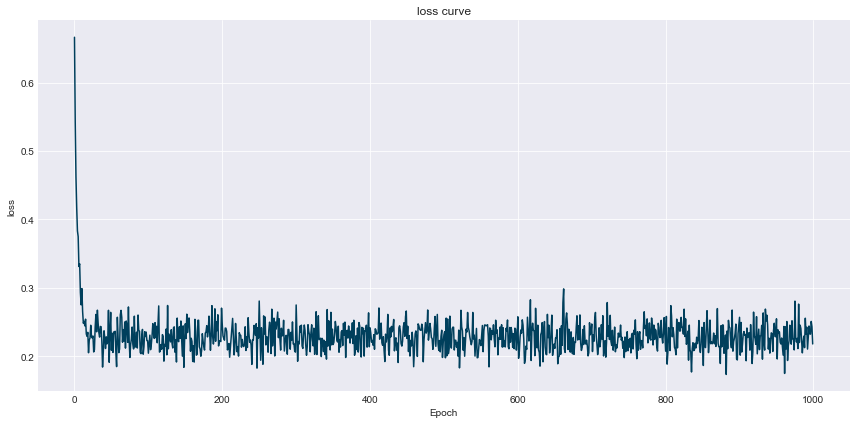

In [8]:
plot_stats(stats)

In [9]:
[p for p in model.model.parameters()]
torch.cat([p.view(-1) for p in model.model.parameters()], dim=0).view(-1, 1)

tensor([[ 0.9931],
        [-0.3852],
        [-0.3244],
        [ 0.0174],
        [-0.0911],
        [-0.3979],
        [-0.1093],
        [-0.2728],
        [-0.4745],
        [-0.4763],
        [-0.9991],
        [-0.8161],
        [-0.3551],
        [-0.6661],
        [ 1.8649],
        [ 0.2308],
        [-1.9537],
        [ 0.4971],
        [ 0.2531],
        [-1.9499],
        [ 0.1888]], grad_fn=<ViewBackward>)

In [10]:
model.model.log_prob(torch.tensor(y).float(), torch.tensor(x).float())

tensor([[7.4020e-01],
        [1.0111e-02],
        [7.8502e-01],
        [9.9930e-01],
        [1.2600e-02],
        [9.7405e-01],
        [1.0710e-08],
        [1.4946e-01],
        [9.9702e-01],
        [4.1881e-01],
        [3.6095e-03],
        [9.8878e-01],
        [1.6955e-02],
        [6.4318e-02],
        [9.9450e-01],
        [9.6903e-01],
        [8.3307e-01],
        [6.5289e-05],
        [1.1202e-05],
        [9.1779e-01],
        [1.2214e-03],
        [2.5144e-01],
        [9.3196e-03],
        [2.2715e-02],
        [2.2238e-03],
        [8.9559e-01],
        [5.1602e-02],
        [6.2876e-05],
        [6.1400e-01],
        [9.9817e-01],
        [9.9934e-01],
        [9.6199e-01],
        [4.5882e-02],
        [3.6013e-04],
        [5.8695e-01],
        [5.0631e-01],
        [1.9030e-02],
        [2.4673e-06],
        [8.4190e-01],
        [9.9397e-01],
        [5.7163e-01],
        [2.1073e-01],
        [2.1212e-03],
        [6.2869e-03],
        [3.7179e-01],
        [2

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([-1.3478e+00, -1.0163e-02, -2.4204e-01, -7.0287e-04, -1.2680e-02,
        -2.6292e-02,  0.0000e+00, -1.6188e-01, -2.9849e-03, -8.7035e-01,
        -3.6160e-03, -1.1282e-02, -1.7101e-02, -6.6479e-02, -5.5178e-03,
        -3.1464e-02, -1.7902e+00, -6.5269e-05, -1.1206e-05, -8.5791e-02,
        -1.2221e-03, -2.8960e-01, -9.3632e-03, -2.2977e-02, -2.2263e-03,
        -1.1028e-01, -5.2981e-02, -6.2885e-05, -4.8776e-01, -1.8278e-03,
        -6.6475e-04, -3.8750e-02, -4.6968e-02, -3.6020e-04, -5.3281e-01,
        -6.8061e-01, -1.9214e-02, -2.4438e-06, -1.7209e-01, -6.0455e-03,
        -5.5927e-01, -2.3664e-01, -2.1235e-03, -6.3068e-03, -9.8942e-01,
        -3.0467e-01, -6.0475e-04, -5.3050e-05, -1.6188e-01, -2.8155e-02,
        -3.6986e-02, -4.9912e+00, -4.3672e-03, -2.9028e-02, -2.6363e+00,
        -8.0178e-03, -5.1279e-01, -1.0031e+00, -3.1472e-02, -1.3732e-03,
        -3.8650e-02, -1.2371e-02, -5.1142e-04, -6.5851e-02, -6.7541e-02,
        -2.1150e-01, -3.4331e-02, -2.6763e-05, -2.3

In [11]:
y_pred = model.predict(x)
(y_pred == y).float().mean()

tensor([[7.4020e-01],
        [1.0111e-02],
        [7.8502e-01],
        [9.9930e-01],
        [1.2600e-02],
        [9.7405e-01],
        [1.0710e-08],
        [1.4946e-01],
        [9.9702e-01],
        [4.1881e-01],
        [3.6095e-03],
        [9.8878e-01],
        [1.6955e-02],
        [6.4318e-02],
        [9.9450e-01],
        [9.6903e-01],
        [8.3307e-01],
        [6.5289e-05],
        [1.1202e-05],
        [9.1779e-01],
        [1.2214e-03],
        [2.5144e-01],
        [9.3196e-03],
        [2.2715e-02],
        [2.2238e-03],
        [8.9559e-01],
        [5.1602e-02],
        [6.2876e-05],
        [6.1400e-01],
        [9.9817e-01],
        [9.9934e-01],
        [9.6199e-01],
        [4.5882e-02],
        [3.6013e-04],
        [5.8695e-01],
        [5.0631e-01],
        [1.9030e-02],
        [2.4673e-06],
        [8.4190e-01],
        [9.9397e-01],
        [5.7163e-01],
        [2.1073e-01],
        [2.1212e-03],
        [6.2869e-03],
        [3.7179e-01],
        [2

tensor(0.8400)

In [12]:
model = BayesianLogisticRegression(input_dim=x.size(1))
model.fit(x, y, epochs=1000, lr=0.1, batch_size=1024)
y_pred = model.predict(x)
(y_pred == y).float().mean()

tensor([[0.4777],
        [0.5142],
        [0.3880],
        ...,
        [0.5265],
        [0.1749],
        [0.3155]], grad_fn=<ExpBackward>) tensor([[0.4777],
        [0.5142],
        [0.3880],
        ...,
        [0.5265],
        [0.1749],
        [0.3155]], grad_fn=<SigmoidBackward>)
tensor([[0.3665],
        [0.5253],
        [0.5217],
        ...,
        [0.2922],
        [0.7541],
        [0.6307]], grad_fn=<ExpBackward>) tensor([[0.3665],
        [0.5253],
        [0.5217],
        ...,
        [0.2922],
        [0.7541],
        [0.6307]], grad_fn=<SigmoidBackward>)
tensor([[0.3309],
        [0.3087],
        [0.3590],
        ...,
        [0.6220],
        [0.6220],
        [0.3014]], grad_fn=<ExpBackward>) tensor([[0.3309],
        [0.3087],
        [0.3590],
        ...,
        [0.6220],
        [0.6220],
        [0.3014]], grad_fn=<SigmoidBackward>)
tensor([[0.4459],
        [0.3804],
        [0.5461],
        ...,
        [0.2243],
        [0.2519],
        [0.5957

tensor([[0.2998],
        [0.4637],
        [0.2856],
        ...,
        [0.5665],
        [0.1845],
        [0.6998]], grad_fn=<ExpBackward>) tensor([[0.2998],
        [0.4637],
        [0.2856],
        ...,
        [0.5665],
        [0.1845],
        [0.6998]], grad_fn=<SigmoidBackward>)
tensor([[0.1753],
        [0.3864],
        [0.7141],
        ...,
        [0.2682],
        [0.4986],
        [0.4793]], grad_fn=<ExpBackward>) tensor([[0.1753],
        [0.3864],
        [0.7141],
        ...,
        [0.2682],
        [0.4986],
        [0.4793]], grad_fn=<SigmoidBackward>)
tensor([[0.3443],
        [0.4289],
        [0.6781],
        ...,
        [0.2706],
        [0.6629],
        [0.6411]], grad_fn=<ExpBackward>) tensor([[0.3443],
        [0.4289],
        [0.6781],
        ...,
        [0.2706],
        [0.6629],
        [0.6411]], grad_fn=<SigmoidBackward>)
tensor([[0.4946],
        [0.6035],
        [0.5248],
        ...,
        [0.6578],
        [0.6119],
        [0.1127

        [0.3579]], grad_fn=<ExpBackward>) tensor([[0.4157],
        [0.4832],
        [0.5858],
        ...,
        [0.4252],
        [0.7920],
        [0.3579]], grad_fn=<SigmoidBackward>)
tensor([[0.5050],
        [0.4120],
        [0.4299],
        ...,
        [0.7519],
        [0.3329],
        [0.5112]], grad_fn=<ExpBackward>) tensor([[0.5050],
        [0.4120],
        [0.4299],
        ...,
        [0.7519],
        [0.3329],
        [0.5112]], grad_fn=<SigmoidBackward>)
tensor([[0.6032],
        [0.5655],
        [0.3665],
        ...,
        [0.4929],
        [0.6147],
        [0.7024]], grad_fn=<ExpBackward>) tensor([[0.6032],
        [0.5655],
        [0.3665],
        ...,
        [0.4929],
        [0.6147],
        [0.7024]], grad_fn=<SigmoidBackward>)
tensor([[0.6079],
        [0.5881],
        [0.6302],
        ...,
        [0.3476],
        [0.4673],
        [0.3017]], grad_fn=<ExpBackward>) tensor([[0.6079],
        [0.5881],
        [0.6302],
        ...,
        [

tensor([[0.4878],
        [0.6119],
        [0.4008],
        ...,
        [0.3677],
        [0.3106],
        [0.6307]], grad_fn=<ExpBackward>) tensor([[0.4878],
        [0.6119],
        [0.4008],
        ...,
        [0.3677],
        [0.3106],
        [0.6307]], grad_fn=<SigmoidBackward>)
tensor([[0.5474],
        [0.7082],
        [0.6486],
        ...,
        [0.1817],
        [0.6116],
        [0.6609]], grad_fn=<ExpBackward>) tensor([[0.5474],
        [0.7082],
        [0.6486],
        ...,
        [0.1817],
        [0.6116],
        [0.6609]], grad_fn=<SigmoidBackward>)
tensor([[0.3895],
        [0.6360],
        [0.3779],
        ...,
        [0.3654],
        [0.7584],
        [0.6529]], grad_fn=<ExpBackward>) tensor([[0.3895],
        [0.6360],
        [0.3779],
        ...,
        [0.3654],
        [0.7584],
        [0.6529]], grad_fn=<SigmoidBackward>)
tensor([[0.6539],
        [0.6100],
        [0.4438],
        ...,
        [0.6149],
        [0.6377],
        [0.7573

tensor([[0.2597],
        [0.5918],
        [0.6582],
        ...,
        [0.2597],
        [0.2597],
        [0.5511]], grad_fn=<ExpBackward>) tensor([[0.2597],
        [0.5918],
        [0.6582],
        ...,
        [0.2597],
        [0.2597],
        [0.5511]], grad_fn=<SigmoidBackward>)
tensor([[0.4556],
        [0.6755],
        [0.6199],
        ...,
        [0.6527],
        [0.5745],
        [0.3085]], grad_fn=<ExpBackward>) tensor([[0.4556],
        [0.6755],
        [0.6199],
        ...,
        [0.6527],
        [0.5745],
        [0.3085]], grad_fn=<SigmoidBackward>)
tensor([[0.4142],
        [0.8045],
        [0.3823],
        ...,
        [0.5052],
        [0.3108],
        [0.3108]], grad_fn=<ExpBackward>) tensor([[0.4142],
        [0.8045],
        [0.3823],
        ...,
        [0.5052],
        [0.3108],
        [0.3108]], grad_fn=<SigmoidBackward>)
tensor([[0.5051],
        [0.5012],
        [0.5984],
        ...,
        [0.6139],
        [0.6799],
        [0.2770

        [0.5176]], grad_fn=<ExpBackward>) tensor([[0.3716],
        [0.5820],
        [0.4513],
        ...,
        [0.6810],
        [0.6546],
        [0.5176]], grad_fn=<SigmoidBackward>)
tensor([[0.6061],
        [0.3957],
        [0.6189],
        ...,
        [0.6765],
        [0.6929],
        [0.6644]], grad_fn=<ExpBackward>) tensor([[0.6061],
        [0.3957],
        [0.6189],
        ...,
        [0.6765],
        [0.6929],
        [0.6644]], grad_fn=<SigmoidBackward>)
tensor([[0.6427],
        [0.4989],
        [0.5886],
        ...,
        [0.5823],
        [0.6923],
        [0.4407]], grad_fn=<ExpBackward>) tensor([[0.6427],
        [0.4989],
        [0.5886],
        ...,
        [0.5823],
        [0.6923],
        [0.4407]], grad_fn=<SigmoidBackward>)
tensor([[0.3601],
        [0.6056],
        [0.5928],
        ...,
        [0.3975],
        [0.6811],
        [0.6261]], grad_fn=<ExpBackward>) tensor([[0.3601],
        [0.6056],
        [0.5928],
        ...,
        [

tensor([[0.6210],
        [0.4533],
        [0.6260],
        ...,
        [0.3867],
        [0.3461],
        [0.6652]], grad_fn=<ExpBackward>) tensor([[0.6210],
        [0.4533],
        [0.6260],
        ...,
        [0.3867],
        [0.3461],
        [0.6652]], grad_fn=<SigmoidBackward>)
tensor([[0.5544],
        [0.3689],
        [0.7007],
        ...,
        [0.4057],
        [0.3874],
        [0.4542]], grad_fn=<ExpBackward>) tensor([[0.5544],
        [0.3689],
        [0.7007],
        ...,
        [0.4057],
        [0.3874],
        [0.4542]], grad_fn=<SigmoidBackward>)
tensor([[0.4760],
        [0.4837],
        [0.5781],
        ...,
        [0.6214],
        [0.6483],
        [0.6229]], grad_fn=<ExpBackward>) tensor([[0.4760],
        [0.4837],
        [0.5781],
        ...,
        [0.6214],
        [0.6483],
        [0.6229]], grad_fn=<SigmoidBackward>)
tensor([[0.8207],
        [0.6034],
        [0.5283],
        ...,
        [0.4078],
        [0.4482],
        [0.3514

tensor([[0.5484],
        [0.6032],
        [0.4598],
        ...,
        [0.3740],
        [0.4884],
        [0.5395]], grad_fn=<ExpBackward>) tensor([[0.5484],
        [0.6032],
        [0.4598],
        ...,
        [0.3740],
        [0.4884],
        [0.5395]], grad_fn=<SigmoidBackward>)
tensor([[0.1715],
        [0.3998],
        [0.6095],
        ...,
        [0.5591],
        [0.3986],
        [0.6661]], grad_fn=<ExpBackward>) tensor([[0.1715],
        [0.3998],
        [0.6095],
        ...,
        [0.5591],
        [0.3986],
        [0.6661]], grad_fn=<SigmoidBackward>)
tensor([[0.5649],
        [0.1838],
        [0.2821],
        ...,
        [0.3522],
        [0.3081],
        [0.6175]], grad_fn=<ExpBackward>) tensor([[0.5649],
        [0.1838],
        [0.2821],
        ...,
        [0.3522],
        [0.3081],
        [0.6175]], grad_fn=<SigmoidBackward>)
tensor([[0.4784],
        [0.6094],
        [0.5875],
        ...,
        [0.3871],
        [0.4365],
        [0.4275

tensor([[0.4074],
        [0.4074],
        [0.6261],
        ...,
        [0.3782],
        [0.5344],
        [0.4337]], grad_fn=<ExpBackward>) tensor([[0.4074],
        [0.4074],
        [0.6261],
        ...,
        [0.3782],
        [0.5344],
        [0.4337]], grad_fn=<SigmoidBackward>)
tensor([[0.6433],
        [0.4819],
        [0.5688],
        ...,
        [0.5916],
        [0.6147],
        [0.2301]], grad_fn=<ExpBackward>) tensor([[0.6433],
        [0.4819],
        [0.5688],
        ...,
        [0.5916],
        [0.6147],
        [0.2301]], grad_fn=<SigmoidBackward>)
tensor([[0.2869],
        [0.3716],
        [0.3214],
        ...,
        [0.4870],
        [0.4587],
        [0.5911]], grad_fn=<ExpBackward>) tensor([[0.2869],
        [0.3716],
        [0.3214],
        ...,
        [0.4870],
        [0.4587],
        [0.5911]], grad_fn=<SigmoidBackward>)
tensor([[0.5715],
        [0.4921],
        [0.5715],
        ...,
        [0.4055],
        [0.4772],
        [0.6056

tensor([[0.5067],
        [0.3985],
        [0.7483],
        ...,
        [0.4831],
        [0.6236],
        [0.3733]], grad_fn=<ExpBackward>) tensor([[0.5067],
        [0.3985],
        [0.7483],
        ...,
        [0.4831],
        [0.6236],
        [0.3733]], grad_fn=<SigmoidBackward>)
tensor([[0.6428],
        [0.3655],
        [0.3675],
        ...,
        [0.3915],
        [0.4307],
        [0.5063]], grad_fn=<ExpBackward>) tensor([[0.6428],
        [0.3655],
        [0.3675],
        ...,
        [0.3915],
        [0.4307],
        [0.5063]], grad_fn=<SigmoidBackward>)
tensor([[0.8199],
        [0.5490],
        [0.4176],
        ...,
        [0.7376],
        [0.4176],
        [0.6498]], grad_fn=<ExpBackward>) tensor([[0.8199],
        [0.5490],
        [0.4176],
        ...,
        [0.7376],
        [0.4176],
        [0.6498]], grad_fn=<SigmoidBackward>)
tensor([[0.5489],
        [0.5609],
        [0.1887],
        ...,
        [0.4530],
        [0.6784],
        [0.5791

        [0.5905]], grad_fn=<ExpBackward>) tensor([[0.6338],
        [0.4542],
        [0.6338],
        ...,
        [0.6019],
        [0.5075],
        [0.5905]], grad_fn=<SigmoidBackward>)
tensor([[0.6203],
        [0.6517],
        [0.5931],
        ...,
        [0.3483],
        [0.3972],
        [0.4181]], grad_fn=<ExpBackward>) tensor([[0.6203],
        [0.6517],
        [0.5931],
        ...,
        [0.3483],
        [0.3972],
        [0.4181]], grad_fn=<SigmoidBackward>)
tensor([[0.6575],
        [0.5282],
        [0.5508],
        ...,
        [0.5823],
        [0.5823],
        [0.4014]], grad_fn=<ExpBackward>) tensor([[0.6575],
        [0.5282],
        [0.5508],
        ...,
        [0.5823],
        [0.5823],
        [0.4014]], grad_fn=<SigmoidBackward>)
tensor([[0.3047],
        [0.7427],
        [0.6011],
        ...,
        [0.4186],
        [0.3841],
        [0.6060]], grad_fn=<ExpBackward>) tensor([[0.3047],
        [0.7427],
        [0.6011],
        ...,
        [

        [0.5361]], grad_fn=<ExpBackward>) tensor([[0.7584],
        [0.4038],
        [0.6196],
        ...,
        [0.3166],
        [0.4071],
        [0.5361]], grad_fn=<SigmoidBackward>)
tensor([[0.6592],
        [0.6672],
        [0.5400],
        ...,
        [0.2275],
        [0.5567],
        [0.6561]], grad_fn=<ExpBackward>) tensor([[0.6592],
        [0.6672],
        [0.5400],
        ...,
        [0.2275],
        [0.5567],
        [0.6561]], grad_fn=<SigmoidBackward>)
tensor([[0.6202],
        [0.3902],
        [0.5991],
        ...,
        [0.6483],
        [0.3661],
        [0.3544]], grad_fn=<ExpBackward>) tensor([[0.6202],
        [0.3902],
        [0.5991],
        ...,
        [0.6483],
        [0.3661],
        [0.3544]], grad_fn=<SigmoidBackward>)
tensor([[0.5978],
        [0.6019],
        [0.4170],
        ...,
        [0.6069],
        [0.6352],
        [0.3431]], grad_fn=<ExpBackward>) tensor([[0.5978],
        [0.6019],
        [0.4170],
        ...,
        [

tensor([[0.6977],
        [0.5435],
        [0.4560],
        ...,
        [0.7038],
        [0.5260],
        [0.6066]], grad_fn=<ExpBackward>) tensor([[0.6977],
        [0.5435],
        [0.4560],
        ...,
        [0.7038],
        [0.5260],
        [0.6066]], grad_fn=<SigmoidBackward>)
tensor([[0.4980],
        [0.1027],
        [0.4338],
        ...,
        [0.2878],
        [0.6637],
        [0.5814]], grad_fn=<ExpBackward>) tensor([[0.4980],
        [0.1027],
        [0.4338],
        ...,
        [0.2878],
        [0.6637],
        [0.5814]], grad_fn=<SigmoidBackward>)
tensor([[0.6055],
        [0.5032],
        [0.5303],
        ...,
        [0.5930],
        [0.6612],
        [0.4977]], grad_fn=<ExpBackward>) tensor([[0.6055],
        [0.5032],
        [0.5303],
        ...,
        [0.5930],
        [0.6612],
        [0.4977]], grad_fn=<SigmoidBackward>)
tensor([[0.5826],
        [0.3560],
        [0.6332],
        ...,
        [0.7542],
        [0.4339],
        [0.7255

tensor(0.6400)

In [13]:
x = torch.tensor([0.99999999999, 1e-10])
x

tensor([1.0000e+00, 1.0000e-10])

In [14]:
from dpm.utils import logit, log

In [15]:
logit(x).exp()

tensor([       inf, 2.0000e-10])

In [16]:
log(x).exp()

tensor([1.0000e+00, 2.0000e-10])